In [10]:
!pip install faker
!pip install pandas
!pip install scikit-learn
!pip install matplotlib seaborn


In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv('./curated_report.csv')

# Check the data
print(data.head())

# Encode categorical variables like role, department, skill_name, course_name, competencyLevel
label_encoder = LabelEncoder()
data['role_encoded'] = label_encoder.fit_transform(data['role'])
data['department_encoded'] = label_encoder.fit_transform(data['department'])
data['skill_name_encoded'] = label_encoder.fit_transform(data['skill_name'])
data['course_name_encoded'] = label_encoder.fit_transform(data['course_name'])
data['competencyLevel_encoded'] = label_encoder.fit_transform(data['competencyLevel'])

# Extract relevant features
features = data[['role_encoded', 'department_encoded', 'competencyLevel_encoded', 'skill_name_encoded', 'course_name_encoded']]

# Display encoded features
print(features.head())



   assessment_id  employee_id     employee_name                       email  \
0              1        17995       Tony Castro          fgates@example.org   
1              2        15754   Heather Stanley        joseph06@example.org   
2              3        49440      William Ryan       patrick46@example.net   
3              4         9008  Jennifer Stewart  kristinaparker@example.org   
4              5        12551     Thomas Garcia         oconner@example.com   

                role          department  course_id  \
0   Business Analyst   Quality Assurance         46   
1     Data Scientist   Quality Assurance        156   
2  Software Engineer        Data Science        120   
3     Data Scientist              DevOps         26   
4     Data Scientist  Product Management         26   

                          course_name competencyLevel  rating  skill_id  \
0                        Cloud Devops        advanced       2        31   
1  Data Pipelines With Apache Airflow       

In [12]:
print(features.columns)

Index(['role_encoded', 'department_encoded', 'competencyLevel_encoded',
       'skill_name_encoded', 'course_name_encoded'],
      dtype='object')


In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv('./curated_report.csv')

# Check the data
print(data.head())

# Encode categorical variables like role, department, skill_name, course_name, competencyLevel
label_encoder = LabelEncoder()
data['role_encoded'] = label_encoder.fit_transform(data['role'])
data['department_encoded'] = label_encoder.fit_transform(data['department'])
data['skill_name_encoded'] = label_encoder.fit_transform(data['skill_name'])
data['course_name_encoded'] = label_encoder.fit_transform(data['course_name'])
data['competencyLevel_encoded'] = label_encoder.fit_transform(data['competencyLevel'])

# Create a new DataFrame with all original and encoded columns
new_dataframe = data.copy()  # This will include all the original columns plus the encoded ones

# Display the new DataFrame
print(new_dataframe.head())


   assessment_id  employee_id     employee_name                       email  \
0              1        17995       Tony Castro          fgates@example.org   
1              2        15754   Heather Stanley        joseph06@example.org   
2              3        49440      William Ryan       patrick46@example.net   
3              4         9008  Jennifer Stewart  kristinaparker@example.org   
4              5        12551     Thomas Garcia         oconner@example.com   

                role          department  course_id  \
0   Business Analyst   Quality Assurance         46   
1     Data Scientist   Quality Assurance        156   
2  Software Engineer        Data Science        120   
3     Data Scientist              DevOps         26   
4     Data Scientist  Product Management         26   

                          course_name competencyLevel  rating  skill_id  \
0                        Cloud Devops        advanced       2        31   
1  Data Pipelines With Apache Airflow       

In [14]:
print(new_dataframe.columns)

Index(['assessment_id', 'employee_id', 'employee_name', 'email', 'role',
       'department', 'course_id', 'course_name', 'competencyLevel', 'rating',
       'skill_id', 'skill_name', 'marks', 'date', 'approvalStatus',
       'role_encoded', 'department_encoded', 'skill_name_encoded',
       'course_name_encoded', 'competencyLevel_encoded'],
      dtype='object')


In [24]:
new_dataframe.to_csv('new_dataframe.csv', index=False)

In [15]:
print(data.isnull().sum())


assessment_id              0
employee_id                0
employee_name              0
email                      0
role                       0
department                 0
course_id                  0
course_name                0
competencyLevel            0
rating                     0
skill_id                   0
skill_name                 0
marks                      0
date                       0
approvalStatus             0
role_encoded               0
department_encoded         0
skill_name_encoded         0
course_name_encoded        0
competencyLevel_encoded    0
dtype: int64


In [16]:
print(data.describe())


       assessment_id    employee_id      course_id         rating  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    50000.500000   24997.551240     100.757990       3.066670   
std     28867.657797   14450.812585      57.718006       1.344189   
min         1.000000       2.000000       1.000000       1.000000   
25%     25000.750000   12492.000000      51.000000       2.000000   
50%     50000.500000   25007.000000     101.000000       3.000000   
75%     75000.250000   37545.250000     151.000000       4.000000   
max    100000.000000   50000.000000     200.000000       5.000000   

           skill_id         marks   role_encoded  department_encoded  \
count  100000.00000  100000.00000  100000.000000       100000.000000   
mean      100.65808      74.98735       1.494760            4.508530   
std        57.76784      14.69581       1.120466            2.868914   
min         1.00000      50.00000       0.000000            0.000000   
25%        51.0000

 Competency Level Impact on Course Performance
 

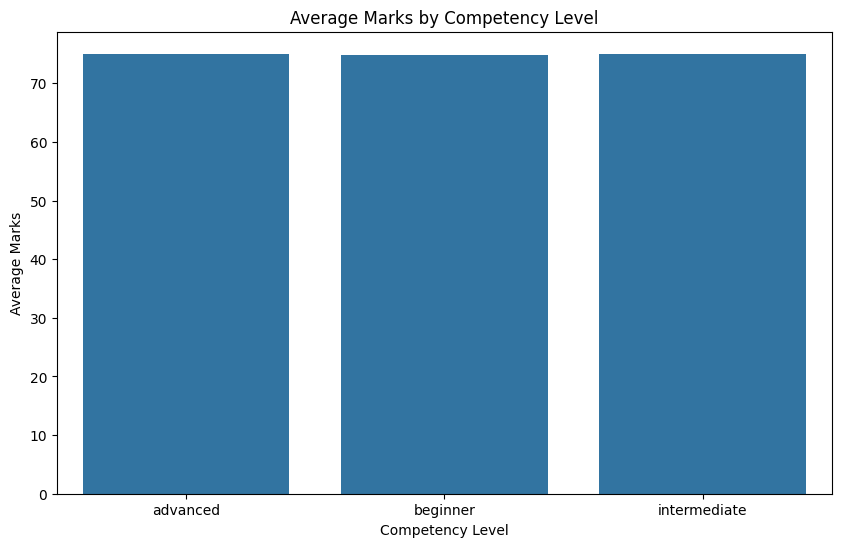

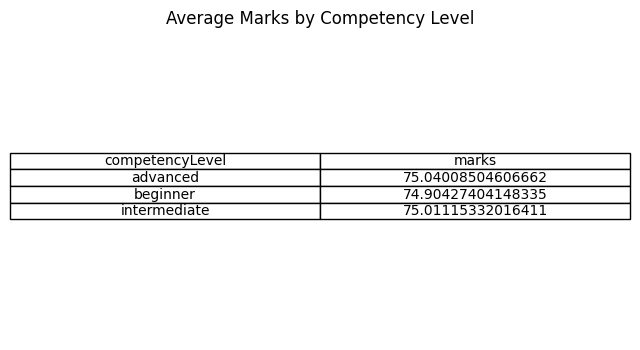

ANOVA F-statistic: 0.7787099879823048, p-value: 0.4590005255733749


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the data
data = pd.read_csv('./curated_report.csv')

# Group by competency level and calculate average marks
competency_performance = data.groupby('competencyLevel')['marks'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='competencyLevel', y='marks', data=competency_performance)
plt.title('Average Marks by Competency Level')
plt.xlabel('Competency Level')
plt.ylabel('Average Marks')
plt.savefig('competency_level_performance.png')  # Save the graph
plt.show()  # Display the graph
plt.close()  # Close the figure

# Create a table
plt.figure(figsize=(8, 4))
plt.axis('off')
plt.table(cellText=competency_performance.values, colLabels=competency_performance.columns, cellLoc='center', loc='center')
plt.title('Average Marks by Competency Level')
plt.savefig('competency_level_table.png')  # Save the table
plt.show()  # Display the table
plt.close()  # Close the figure

# Statistical Test
f_stat, p_val = stats.f_oneway(
    *[data[data['competencyLevel'] == level]['marks'] for level in data['competencyLevel'].unique()]
)
print(f'ANOVA F-statistic: {f_stat}, p-value: {p_val}')


Role-Specific Learning Needs

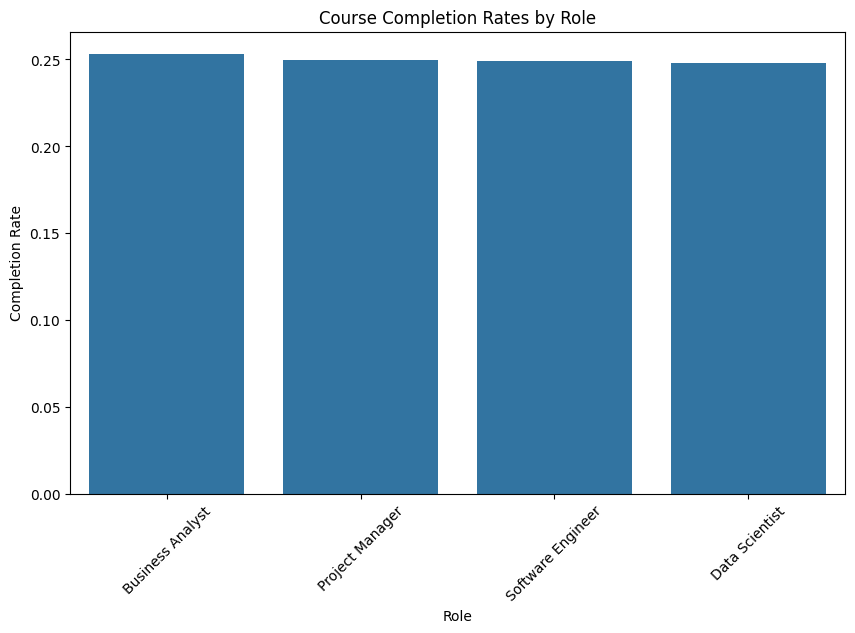

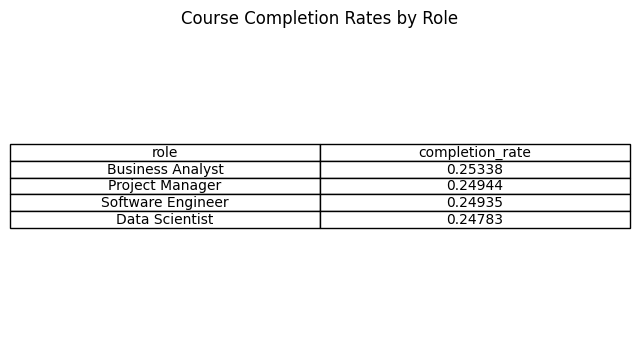

In [20]:
# Course completion rates by role
course_completion_rate = data['role'].value_counts(normalize=True).reset_index()
course_completion_rate.columns = ['role', 'completion_rate']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='role', y='completion_rate', data=course_completion_rate)
plt.title('Course Completion Rates by Role')
plt.xlabel('Role')
plt.ylabel('Completion Rate')
plt.xticks(rotation=45)
plt.savefig('role_completion_rates.png')  # Save the graph
plt.show()  # Display the graph
plt.close()  # Close the figure

# Create a table
plt.figure(figsize=(8, 4))
plt.axis('off')
plt.table(cellText=course_completion_rate.values, colLabels=course_completion_rate.columns, cellLoc='center', loc='center')
plt.title('Course Completion Rates by Role')
plt.savefig('role_completion_table.png')  # Save the table
plt.show()  # Display the table
plt.close()  # Close the figure


 Department Influence on Course Approval Rates

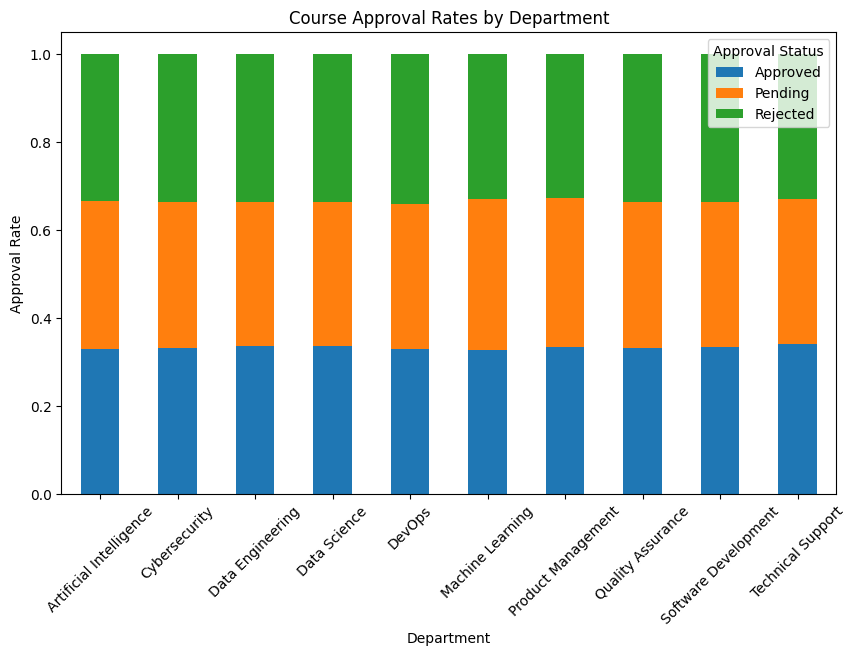

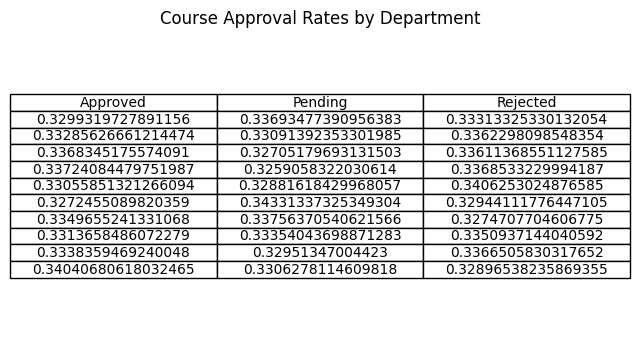

In [21]:
# Approval rates by department
approval_rate = data.groupby('department')['approvalStatus'].value_counts(normalize=True).unstack().fillna(0)
approval_rate.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Course Approval Rates by Department')
plt.xlabel('Department')
plt.ylabel('Approval Rate')
plt.legend(title='Approval Status')
plt.xticks(rotation=45)
plt.savefig('department_approval_rates.png')  # Save the graph
plt.show()  # Display the graph
plt.close()  # Close the figure

# Create a table
plt.figure(figsize=(8, 4))
plt.axis('off')
plt.table(cellText=approval_rate.values, colLabels=approval_rate.columns, cellLoc='center', loc='center')
plt.title('Course Approval Rates by Department')
plt.savefig('department_approval_table.png')  # Save the table
plt.show()  # Display the table
plt.close()  # Close the figure


Effect of Course Type on Learning Outcomes

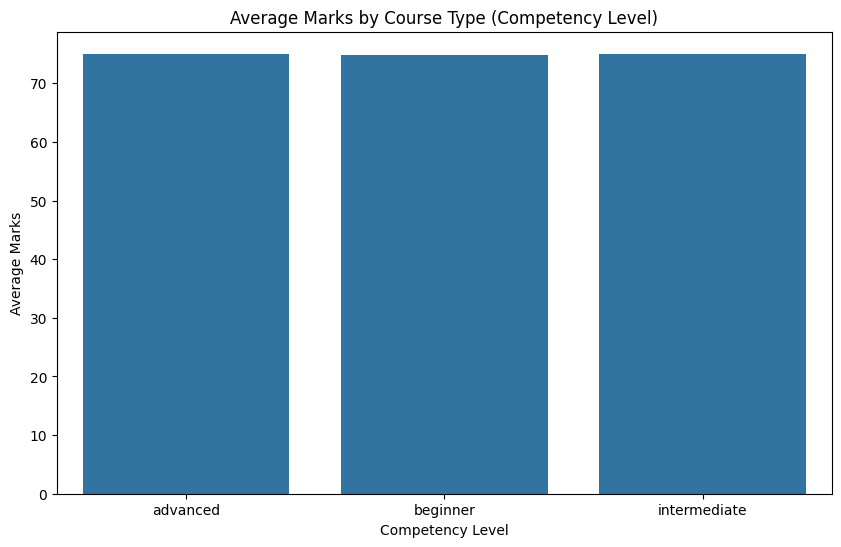

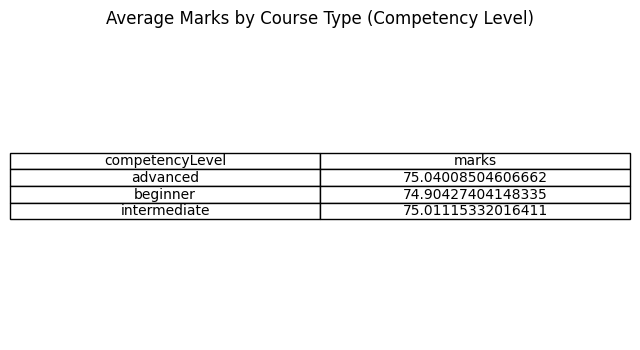

In [22]:
# Average marks by course type (competency level)
average_marks_by_course_type = data.groupby('competencyLevel')['marks'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='competencyLevel', y='marks', data=average_marks_by_course_type)
plt.title('Average Marks by Course Type (Competency Level)')
plt.xlabel('Competency Level')
plt.ylabel('Average Marks')
plt.savefig('course_type_learning_outcomes.png')  # Save the graph
plt.show()  # Display the graph
plt.close()  # Close the figure

# Create a table
plt.figure(figsize=(8, 4))
plt.axis('off')
plt.table(cellText=average_marks_by_course_type.values, colLabels=average_marks_by_course_type.columns, cellLoc='center', loc='center')
plt.title('Average Marks by Course Type (Competency Level)')
plt.savefig('course_type_table.png')  # Save the table
plt.show()  # Display the table
plt.close()  # Close the figure


 Approval Status Influence on Learning Paths

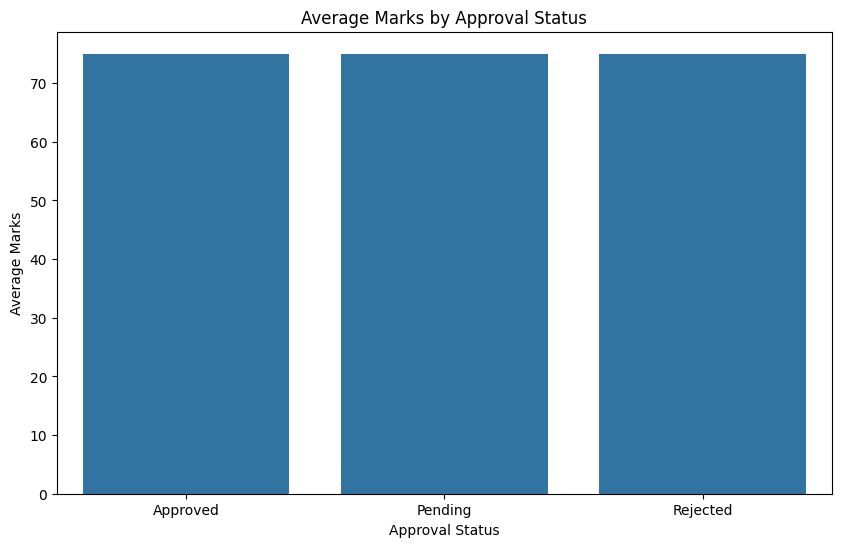

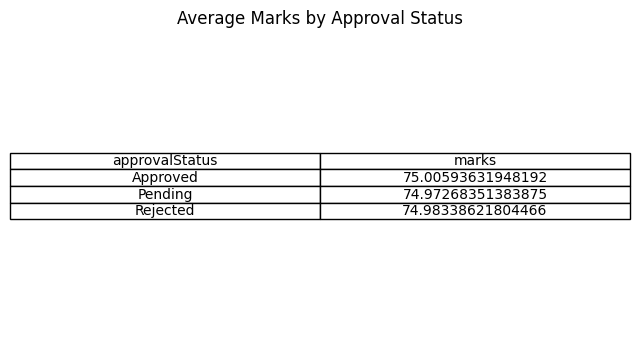

In [23]:
# Average marks based on approval status
approval_status_performance = data.groupby('approvalStatus')['marks'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='approvalStatus', y='marks', data=approval_status_performance)
plt.title('Average Marks by Approval Status')
plt.xlabel('Approval Status')
plt.ylabel('Average Marks')
plt.savefig('approval_status_learning_paths.png')  # Save the graph
plt.show()  # Display the graph
plt.close()  # Close the figure

# Create a table
plt.figure(figsize=(8, 4))
plt.axis('off')
plt.table(cellText=approval_status_performance.values, colLabels=approval_status_performance.columns, cellLoc='center', loc='center')
plt.title('Average Marks by Approval Status')
plt.savefig('approval_status_table.png')  # Save the table
plt.show()  # Display the table
plt.close()  # Close the figure
